## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

In [2]:
estados = gpd.read_file('/Users/luciavarelag/Desktop/Estados/conjunto_de_datos/00ent.shp')

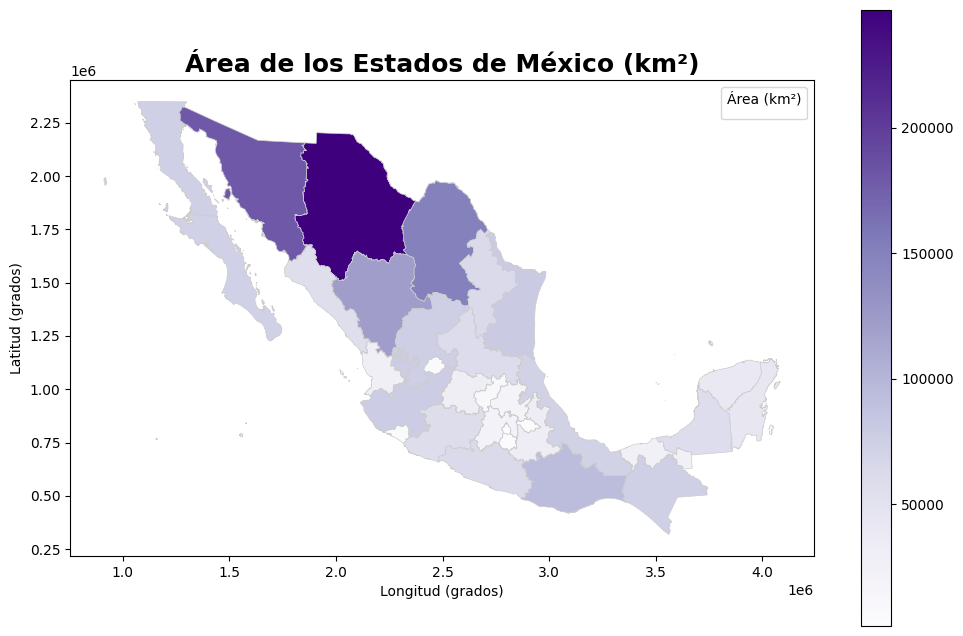

In [3]:
estados["area_km2"] = estados.area / 10**6

fig, ax = plt.subplots(figsize=(12, 8))
estados.plot(column='area_km2', cmap='Purples', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Área de los Estados de México (km²)', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax.set_xlabel('Longitud (grados)')
ax.set_ylabel('Latitud (grados)')

# Agregar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Área (km²)')

plt.show()

#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [4]:
escuelas = gpd.read_file('/Users/luciavarelag/Desktop/Escuelas/conjunto_de_datos/denue_inegi_61_.shp')

El área total ocupada por las zonas buffer es de 315853.61 km²


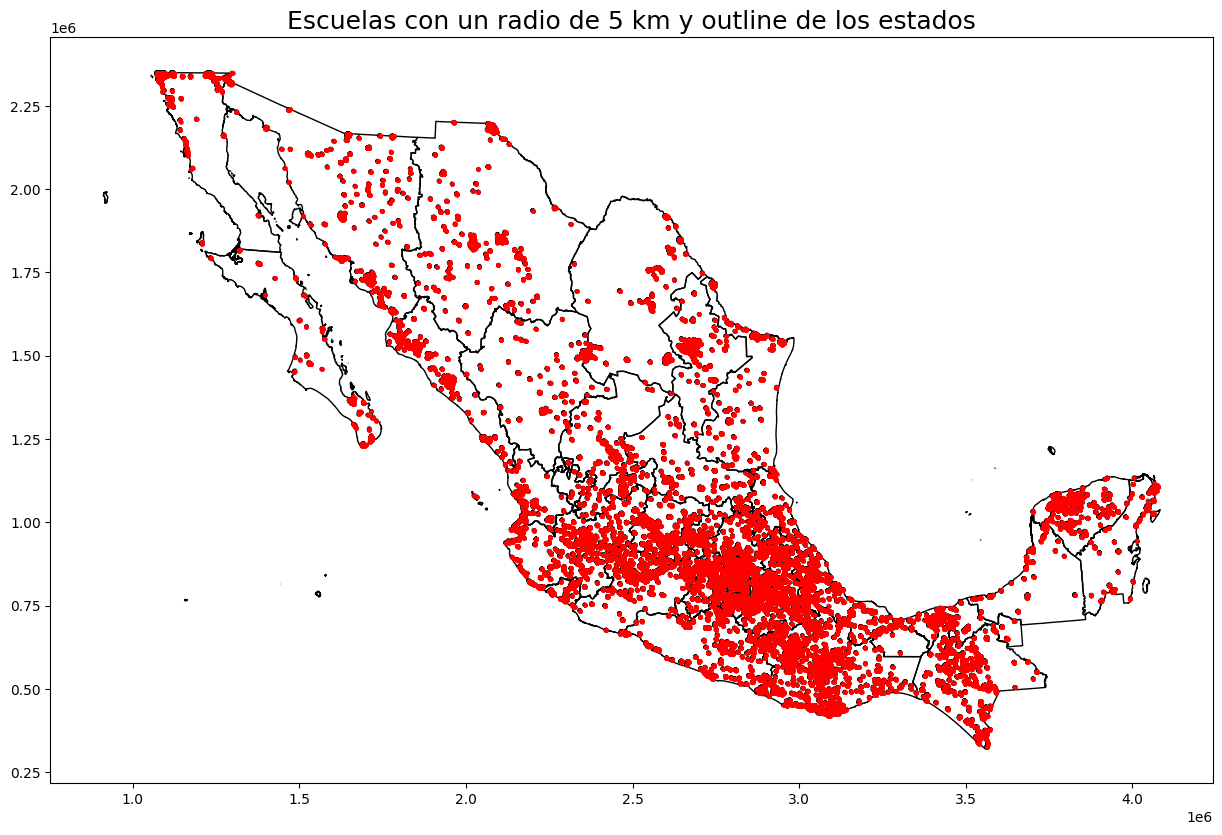

In [5]:
def calcular_area_total(buffer):
    area_total = buffer.unary_union.area / 10**6
    return area_total

def plot_escuelas_con_buffer(escuelas, estados, buffer_escuelas):
    fig, ax = plt.subplots(figsize=(15, 10))
    estados.plot(ax=ax, edgecolor='black', facecolor='none')  
    buffer_escuelas.plot(ax=ax, color='blue', edgecolor='black', alpha=0.6)  
    escuelas.plot(ax=ax, color='red', markersize=5)
    
    ax.set_title("Escuelas con un radio de 5 km y outline de los estados", fontsize=18)
    plt.show()

# Convertir a sistema de coordenadas UTM
estados_utm = estados.to_crs(epsg=6362)
escuelas_utm = escuelas.to_crs(epsg=6362)

# Crear un buffer de 5 km alrededor de todas las escuelas
buffer_escuelas = escuelas_utm.buffer(5000)

# Calcular el área total ocupada por las zonas buffer
area_total = calcular_area_total(buffer_escuelas)
print(f"El área total ocupada por las zonas buffer es de {area_total:.2f} km²")

# Generar el gráfico
plot_escuelas_con_buffer(escuelas_utm, estados_utm, buffer_escuelas)

#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [6]:
from shapely.geometry import MultiPolygon

In [7]:
estados = estados.to_crs(epsg=6362)  # Proyección UTM Zona 12N (México)

cdmx = estados[estados['NOMGEO'] == 'Ciudad de México'].geometry.values[0]

otros_estados = estados[estados['NOMGEO'] != 'Ciudad de México'].reset_index(drop=True)

def distancia_minima(geometria1, geometria2):
    if isinstance(geometria1, MultiPolygon):
        geometria1 = geometria1.buffer(0)
    if isinstance(geometria2, MultiPolygon):
        geometria2 = geometria2.buffer(0)
    return geometria1.distance(geometria2)

distancias = otros_estados.geometry.apply(lambda geom: distancia_minima(cdmx, geom))

resultados = gpd.GeoDataFrame(
    {'Estado': otros_estados['NOMGEO'], 'Distancia (km)': distancias / 1000},
    geometry=otros_estados.geometry
)

print(resultados[['Estado', 'Distancia (km)']])

                             Estado  Distancia (km)
0                    Aguascalientes      379.557116
1                   Baja California     1645.551348
2               Baja California Sur     1127.556532
3                          Campeche      682.973830
4              Coahuila de Zaragoza      573.236161
5                            Colima      431.986957
6                           Chiapas      579.734459
7                         Chihuahua      913.759024
8                           Durango      618.267663
9                        Guanajuato      128.951548
10                         Guerrero       50.114395
11                          Hidalgo       28.546022
12                          Jalisco      305.170985
13                           México        0.000000
14              Michoacán de Ocampo       88.191628
15                          Morelos        0.000000
16                          Nayarit      508.830115
17                       Nuevo León      412.739017
18          

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [8]:
servicios = gpd.read_file("/Users/luciavarelag/Desktop/denue_00_54_shp/conjunto_de_datos/denue_inegi_54_.shp")

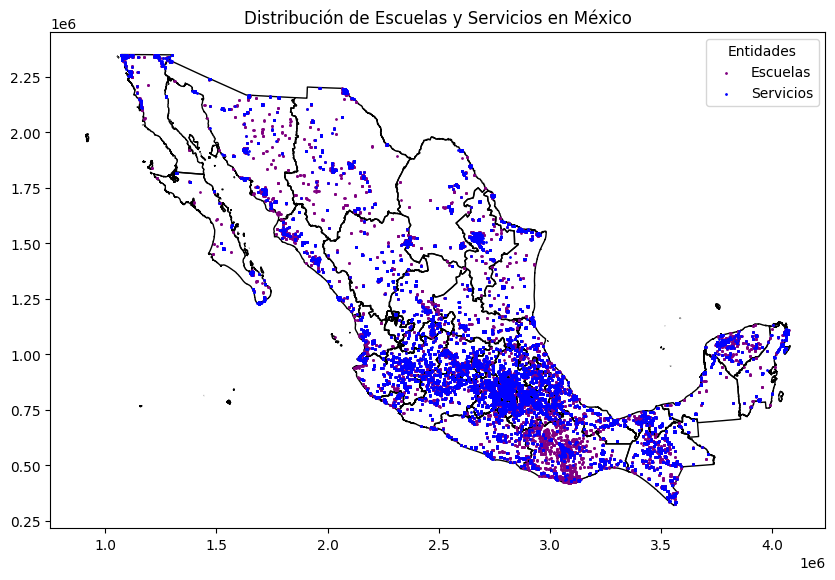

In [9]:
regex = r"(?i)(primaria|escuela básica|escuela elemental|secundaria|escuela media|educación media|preparatoria|bachillerato|prepa|colegio)"
escuelas = escuelas[escuelas['nom_estab'].str.extract(regex, expand=False).notna()]

fig, ax = plt.subplots(figsize=(10, 10))

estados_utm = estados.to_crs(epsg=6362)
estados_utm.plot(ax=ax, edgecolor='black', facecolor='none')

escuelas = escuelas.to_crs(epsg=6362)
escuelas.plot(ax=ax, color='purple', markersize=1, label='Escuelas')

servicios = servicios.to_crs(epsg=6362)
servicios.plot(ax=ax, color='blue', markersize=1, label='Servicios')

plt.legend(title='Entidades')
plt.title('Distribución de Escuelas y Servicios en México')

plt.show()


In [ ]:
Observamos que la mayor cantidad de escuelas y servicios se concentra en el centro del país, puede ser que haya una relación porque alli hay una gran concentración y densidad poblacional. 
